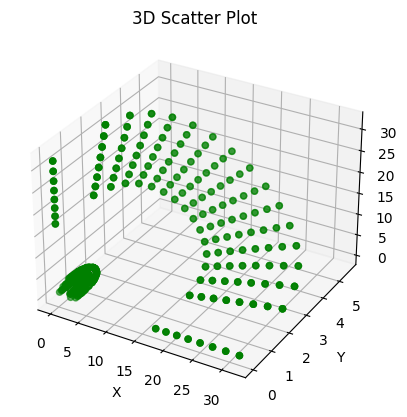

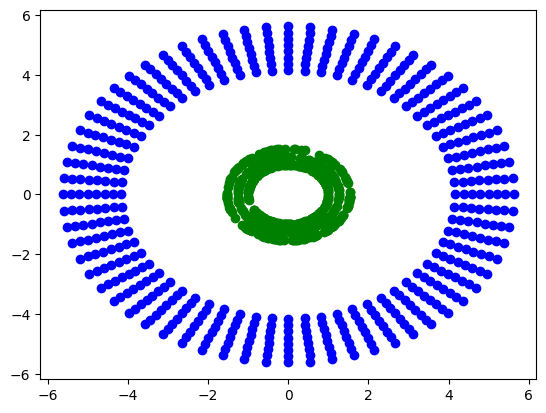

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#def load_data(loc):
    # # Will load the data send the location of the data folder to this function
    # # x, y = load_data('data')
    # data = np.genfromtxt(loc+'/kmeans_data.txt', delimiter='  ')
    # return data

def dist(x, u):
    d = np.zeros((x.shape[0], u.shape[0]))
    for i in range(u.shape[0]):
        diff = x - u[i,:].reshape((1,-1))
        d[:,i] = np.sum(np.square(diff), axis=1)
    return d

def predict(x, u):
    d = dist(x, u)
    c = np.argmin(d, axis=1)
    return c.reshape(-1,1)

def mean(x, c):
    c=c.ravel()
    u = np.zeros((2, x.shape[1]))
    u[0,:] = np.mean(x[c==0], axis=0)
    u[1,:] = np.mean(x[c==1], axis=0)
    return u

def cluster():
    X = np.genfromtxt('kmeans_data.txt', delimiter='  ')
    #fx = (np.sum(np.power(x,3), axis=1)).reshape(-1,1)
    #ft=[]
    fy=np.zeros((X.shape[0], 3))
    for i in range(0,X.shape[0]):
        fy[i][0]=X[i][0]*X[i][0]
        fy[i][1]=np.sqrt(2*np.abs(X[i][0]*X[i][1]))
        fy[i][2]=X[i][1]*X[i][1]
        


        # temp=[]
        # temp.append(1)
        # temp.append(i[0]*i[0])
        # temp.append(i[1]*i[1])
        # temp.append(np.power(2,0.5)*i[0])
        # temp.append(np.power(2,0.5)*i[0])
        # temp.append(np.power(2,0.5)*i[0]*i[1])
        # ft.append(temp)
    #print(x)
    #print(fy)

    fx=fy
    x = fx[:, 0]
    y = fx[:, 1]
    z = fx[:, 2]
    # plt.scatter(x,y,z,c='g',marker='o')
    # plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='g', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title('3D Scatter Plot')
    plt.show()

    
    #fx=np.square(np.sum(x,axis=1)).reshape(-1,1)
    #fx=np.prod(x, axis=1)
    #fx=np.square(fx).reshape(-1,1)

    u = fx[:2,:]
    #print(u)
    c = predict(fx, u)
    #print(c)

    for iter in range(10):
        u = mean(fx, c)
        c = predict(fx, u)
        c=c.ravel()
        p = (c==1).reshape(c.shape[0])
        n = (c==0).reshape(c.shape[0])
        # print(u)

    plt.scatter(X[p,0], X[p,1], c='b')
    plt.scatter(X[n,0], X[n,1], c='g')
    plt.show()

    
if __name__ == "__main__":
    cluster()
